In [2]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
 
from hypernets.utils import logging as hyn_logging

from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils

hyn_logging.set_level(hyn_logging.WARN)

In [3]:
df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y = df_train.pop('y')
y_test = df_test.pop('y')

### Training

In [5]:
config = deeptable.ModelConfig(nets=deepnets.DeepFM, auto_discrete=True, metrics=['AUC'], earlystopping_patience=3)
dt = deeptable.DeepTable(config=config)

model, history = dt.fit(df_train, y, epochs=20)

Epoch 1/20
22/22 [==============================] - 3s 18ms/step - loss: 77.1620 - auc: 0.5167 - val_loss: 60.9973 - val_auc: 0.5356
Epoch 2/20
22/22 [==============================] - 0s 6ms/step - loss: 37.5803 - auc: 0.6162 - val_loss: 23.3905 - val_auc: 0.6525
Epoch 3/20
22/22 [==============================] - 0s 6ms/step - loss: 13.4394 - auc: 0.7317 - val_loss: 13.6759 - val_auc: 0.6800
Epoch 4/20
22/22 [==============================] - 0s 7ms/step - loss: 7.2127 - auc: 0.6783 - val_loss: 8.7352 - val_auc: 0.6615
Epoch 5/20
22/22 [==============================] - 0s 5ms/step - loss: 4.4354 - auc: 0.6518 - val_loss: 7.5370 - val_auc: 0.6625
Epoch 6/20
22/22 [==============================] - 0s 5ms/step - loss: 3.2812 - auc: 0.6875 - val_loss: 6.9606 - val_auc: 0.7317
Epoch 7/20
22/22 [==============================] - 0s 5ms/step - loss: 2.6823 - auc: 0.7307 - val_loss: 8.1676 - val_auc: 0.7239
Epoch 8/20
22/22 [==============================] - 0s 5ms/step - loss: 2.3744 - au

In [6]:
proba = dt.predict_proba(df_test)
preds = dt.predict(df_test)

#model.model.summary()

### Persist

In [20]:
from hypernets.utils import fs

model_dir = "model_dir"
dt.save(model_dir)

print(f"Absolute path for the persisted model: {fs.remote_root_}/{model_dir}")

model_load = deeptable.DeepTable.load(model_dir)
model_load.evaluate(df_test,y_test, batch_size=512, verbose=0)

Absolute path for the persisted model: /tmp/workdir/model_dir


{'loss': 6.560118675231934, 'auc': 0.7714197635650635}

### Show network architecture

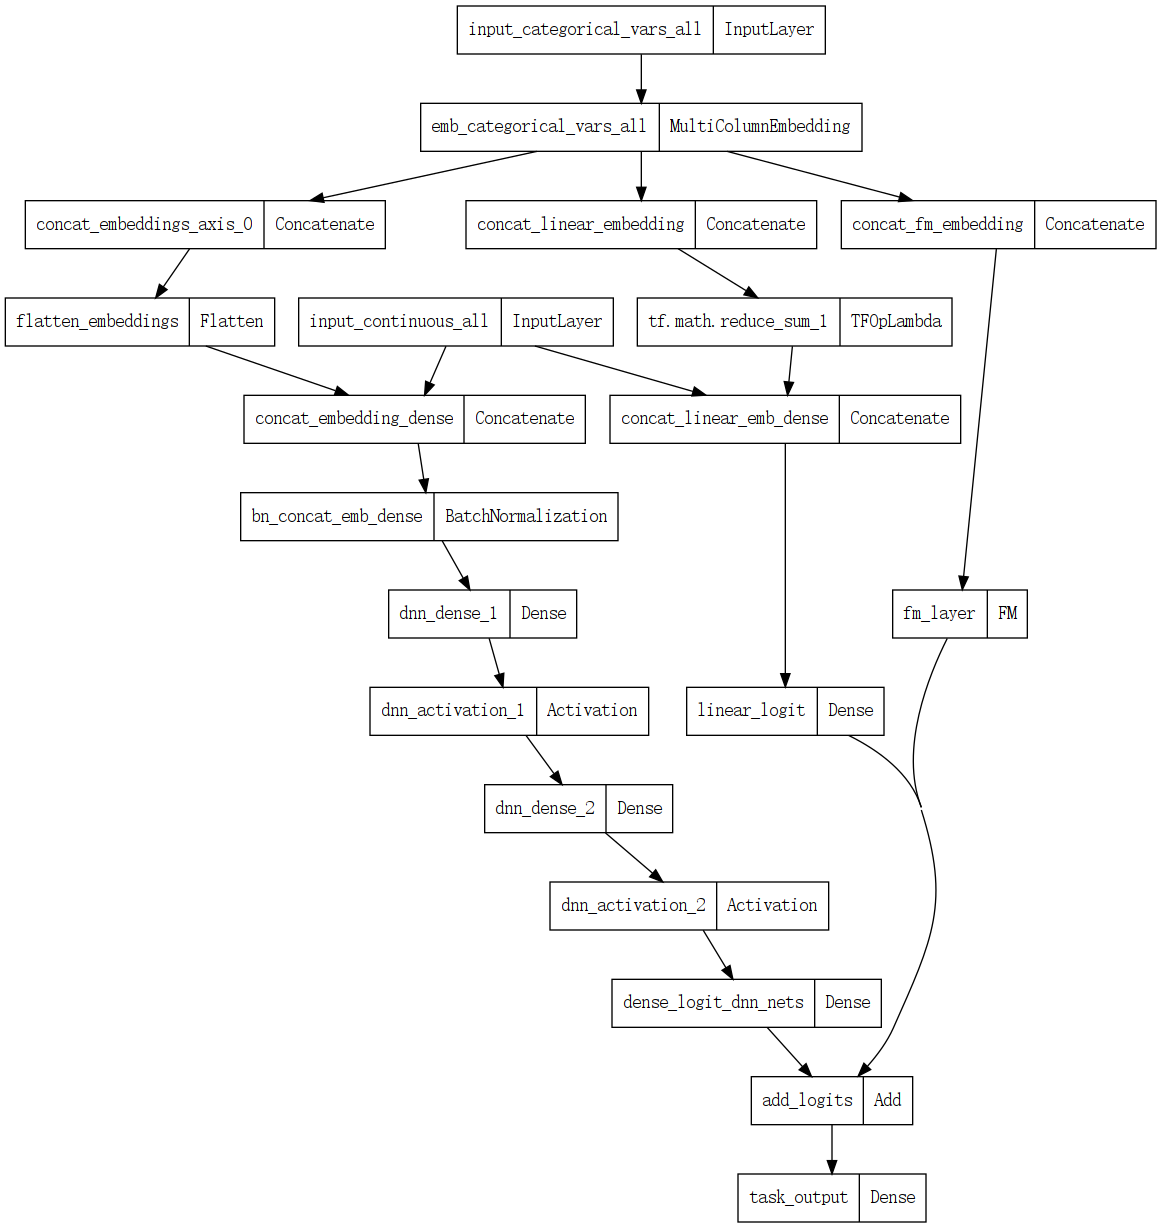

In [9]:
from tensorflow.keras.utils import plot_model
# make sure pydot is installed by command `conda install -c conda-forge pydot` 
plot_model(model.model)

### Evaluate

In [10]:
result = dt.evaluate(df_test,y_test, batch_size=512, verbose=0)
result

{'loss': 6.560118675231934, 'auc': 0.7714197635650635}

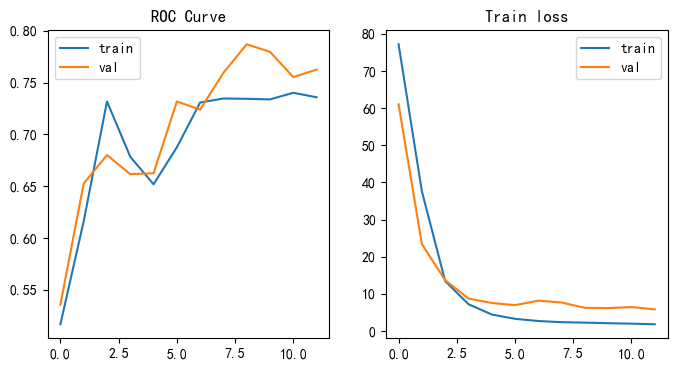

In [19]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))


ax1.plot(history.history['AUC'])
ax1.plot(history.history['val_AUC'])
ax1.legend(['train', 'val'], loc='upper left')
ax1.set_title("ROC Curve")

ax2.plot(history.history['loss'],label='loss')
ax2.plot(history.history['val_loss'])
ax2.legend(['train', 'val'], loc='upper right')
ax2.set_title("Train loss")

plt.show()